<a href="https://colab.research.google.com/github/SaddamRafiq/Crypto-Thesis/blob/main/ARIMA_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
2024-11-27 00:00:00+00:00,95962.531250,95962.531250,97361.179688,91778.664062,91978.140625,71133452438
2024-11-28 00:00:00+00:00,95652.468750,95652.468750,96650.203125,94677.351562,95954.945312,52260008261


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

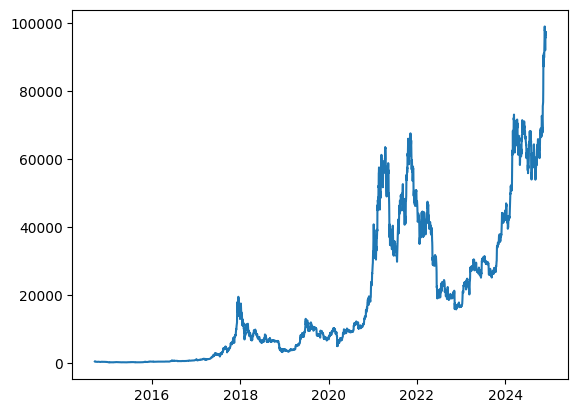

In [ ]:
#PLot BTC till Date
plt.plot(df.index, df['Adj Close'])
plt.show()

In [ ]:
#Train and Test Split
train_size = int(len(df) * 0.9)
train_data = df[:train_size]['Adj Close']
test_data = df[train_size:]['Adj Close']


train_data


Ticker,BTC-USD
Date,
2014-09-17 00:00:00+00:00,457.334015
2014-09-18 00:00:00+00:00,424.440002
2014-09-19 00:00:00+00:00,394.795990
2014-09-20 00:00:00+00:00,408.903992
2014-09-21 00:00:00+00:00,398.821014
...,...
2023-11-20 00:00:00+00:00,37476.957031
2023-11-21 00:00:00+00:00,35813.812500
2023-11-22 00:00:00+00:00,37432.339844


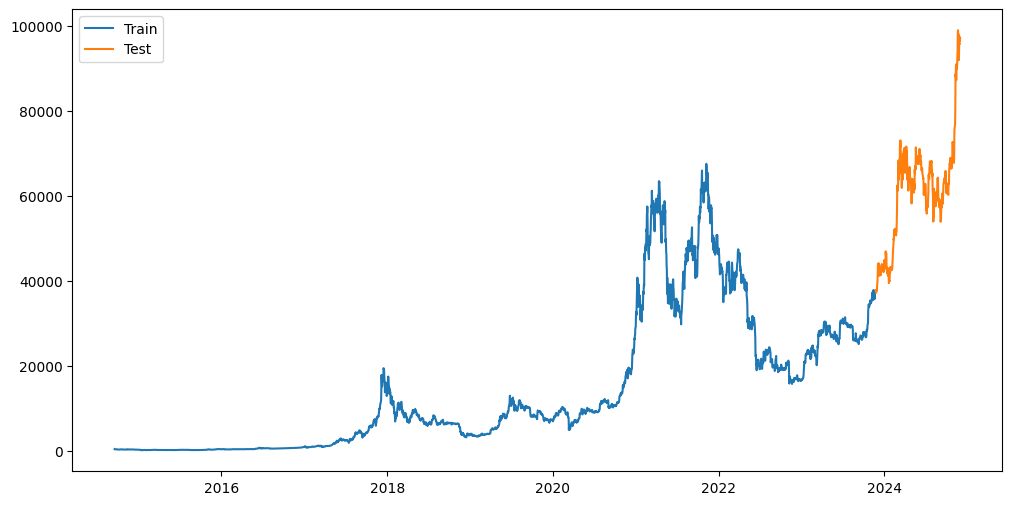

In [ ]:
#Plot Split Data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.legend()
plt.show()

In [ ]:
model_predictions = []
n_test_observations = len(test_data)

In [ ]:
for i in range(n_test_observations):
    model = ARIMA(train_data, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    # Access the first element using iloc instead of direct indexing
    yhat = output.iloc[0]
    model_predictions.append(yhat)
    actual_test_value = test_data.iloc[i]
    # Create a DataFrame from actual_test_value with the same column name
    actual_test_value_df = pd.DataFrame([actual_test_value], columns=train_data.columns, index=[test_data.index[i]])
    # Concatenate train_data with the new DataFrame
    train_data = pd.concat([train_data, actual_test_value_df])
    break

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                BTC-USD   No. Observations:                 3372
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -27228.241
Date:                Sun, 01 Dec 2024   AIC                          54466.481
Time:                        12:52:56   BIC                          54497.096
Sample:                             0   HQIC                         54477.428
                               - 3372                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0245      0.009     -2.720      0.007      -0.042      -0.007
ar.L2          0.0103      0.009      1.186      0.236      -0.007       0.027
ar.L3          0.0230      0.009      2.468      0.0

ValueError: x and y must have same first dimension, but have shapes (373,) and (18,)

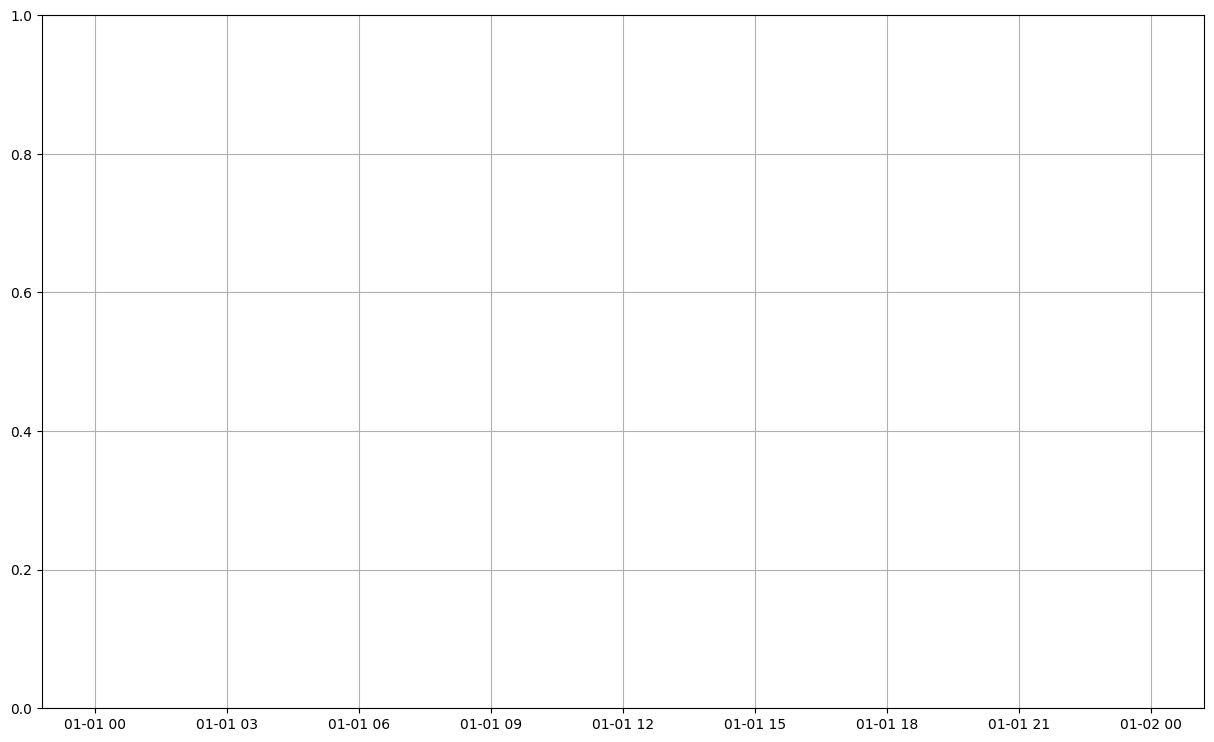

In [ ]:
plt.figure(figsize=(15, 9))
plt.grid(True)
date_range = df[train_size:].index
plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label='BTC Predicted Price')
plt.plot(date_range, test_data, color = 'red',  label='BTC Actual Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BTC Price Prediction')
plt.legend()
plt.show()